In [26]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd

In [27]:
#setup plotting 

plotting.setup_mpl()

# Enable the cache
ff1.Cache.enable_cache('cache') 

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None

In [28]:
# Load the session data
race = ff1.get_session(2021, 'Russia', 'R')

# Get the laps
laps = race.load_laps(with_telemetry=True)

C:\Users\Uni\anaconda3\lib\site-packages\fastf1\core.py:1127: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Russian Grand Prix - Race [v2.2.9]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '55', '3', '77', '14', '4', '7', '11', '63

In [29]:
# Calculate RaceLapNumber (LapNumber minus 1 since the warmup lap is included in LapNumber)
laps['RaceLapNumber'] = laps['LapNumber'] - 1

# Starting from lap 45 it started raining
laps = laps.loc[laps['RaceLapNumber'] >= 45]

laps

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,RaceLapNumber
45,0 days 02:20:03.961000,44,0 days 00:01:38.942000,46,2,NaT,NaT,0 days 00:00:35.421000,0 days 00:00:34.746000,0 days 00:00:28.775000,...,HARD,20.0,True,0 days 02:18:25.019000,Mercedes,HAM,1,True,2021-09-26 13:19:26.912,45
46,0 days 02:21:46.573000,44,0 days 00:01:42.612000,47,2,NaT,NaT,0 days 00:00:35.607000,0 days 00:00:37.453000,0 days 00:00:29.552000,...,HARD,21.0,True,0 days 02:20:03.961000,Mercedes,HAM,1,True,2021-09-26 13:21:05.854,46
47,0 days 02:23:42.303000,44,0 days 00:01:55.730000,48,2,NaT,NaT,0 days 00:00:38.142000,0 days 00:00:44.200000,0 days 00:00:33.388000,...,HARD,22.0,True,0 days 02:21:46.573000,Mercedes,HAM,2,True,2021-09-26 13:22:48.466,47
48,0 days 02:25:39.182000,44,0 days 00:01:56.879000,49,2,NaT,0 days 02:25:30.666000,0 days 00:00:37.695000,0 days 00:00:43.480000,0 days 00:00:35.704000,...,HARD,23.0,True,0 days 02:23:42.303000,Mercedes,HAM,2,False,2021-09-26 13:24:44.196,48
49,0 days 02:27:45.498000,44,0 days 00:02:06.316000,50,3,0 days 02:26:00.701000,NaT,0 days 00:00:56.972000,0 days 00:00:38.328000,0 days 00:00:31.016000,...,INTERMEDIATE,1.0,True,0 days 02:25:39.182000,Mercedes,HAM,1,False,2021-09-26 13:26:41.075,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,0 days 02:29:38.169000,9,0 days 00:02:06.584000,49,3,NaT,NaT,0 days 00:00:47.077000,0 days 00:00:43.912000,0 days 00:00:35.595000,...,INTERMEDIATE,3.0,True,0 days 02:27:31.585000,Haas F1 Team,MAZ,2,True,2021-09-26 13:28:33.478,48
944,0 days 02:31:43.118000,9,0 days 00:02:04.949000,50,3,NaT,NaT,0 days 00:00:45.959000,0 days 00:00:42.693000,0 days 00:00:36.297000,...,INTERMEDIATE,4.0,True,0 days 02:29:38.169000,Haas F1 Team,MAZ,2,True,2021-09-26 13:30:40.062,49
945,0 days 02:33:39.179000,9,0 days 00:01:56.061000,51,3,NaT,NaT,0 days 00:00:40.506000,0 days 00:00:40.430000,0 days 00:00:35.125000,...,INTERMEDIATE,5.0,True,0 days 02:31:43.118000,Haas F1 Team,MAZ,1,True,2021-09-26 13:32:45.011,50
991,0 days 02:21:25.832000,6,0 days 00:01:41.642000,46,2,NaT,NaT,0 days 00:00:35.953000,0 days 00:00:35.903000,0 days 00:00:29.786000,...,HARD,33.0,True,0 days 02:19:44.190000,Williams,LAT,1,True,2021-09-26 13:20:46.083,45


In [5]:
# Get all drivers
drivers = pd.unique(laps['Driver'])

telemetry = pd.DataFrame()

# Telemetry can only be retrieved driver-by-driver
for driver in drivers:
    driver_laps = laps.pick_driver(driver)
    
    # Since we want to compare distances, we need to collect telemetry lap-by-lap to reset the distance
    for lap in driver_laps.iterlaps():
        driver_telemetry = lap[1].get_telemetry().add_distance()
        driver_telemetry['Driver'] = driver
        driver_telemetry['Lap'] = lap[1]['RaceLapNumber']
        driver_telemetry['Compound'] = lap[1]['Compound']
    
        telemetry = telemetry.append(driver_telemetry)

In [6]:
# Only keep required columns
telemetry = telemetry[['Lap', 'Distance', 'Compound', 'Speed', 'X','Y']]

# Everything that's not intermediate will be "slick"
telemetry['Compound'].loc[telemetry['Compound'] != 'INTERMEDIATE'] = 'SLICK'

In [7]:
# We want 25 mini-sectors
num_minisectors = 25

# What is the total distance of a lap?
total_distance = max(telemetry['Distance'])

# Generate equally sized mini-sectors 
minisector_length = total_distance / num_minisectors

minisectors = [0]

for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))
    


In [8]:
# Assign minisector to every row in the telemetry data
telemetry['Minisector'] =  telemetry['Distance'].apply(
  lambda z: (
    minisectors.index(
      min(minisectors, key=lambda x: abs(x-z)))+1
  )
)


In [9]:
# Calculate fastest tyre per mini sector
average_speed = telemetry.groupby(['Lap', 'Minisector', 'Compound'])['Speed'].mean().reset_index()


In [10]:
# Select the compound with the highest average speed
fastest_compounds = average_speed.loc[average_speed.groupby(['Lap', 'Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the Compound column
fastest_compounds = fastest_compounds[['Lap', 'Minisector', 'Compound']].rename(columns={'Compound': 'Fastest_compound'})

In [11]:
fastest_compounds

,Lap,Minisector,Fastest_compound
0,45,1,SLICK
1,45,2,SLICK
2,45,3,SLICK
3,45,4,SLICK
4,45,5,SLICK
...,...,...,...
320,52,21,INTERMEDIATE
321,52,22,INTERMEDIATE
322,52,23,INTERMEDIATE
323,52,24,INTERMEDIATE


In [12]:
# Join the fastest compound per minisector with the full telemetry
telemetry = telemetry.merge(fastest_compounds, on=['Lap', 'Minisector'])

# Order the data by distance to make matploblib does not get confused
telemetry = telemetry.sort_values(by=['Distance'])

# Assign integer value to the compound because that's what matplotlib wants
telemetry.loc[telemetry['Fastest_compound'] == "INTERMEDIATE", 'Fastest_compound_int'] = 1
telemetry.loc[telemetry['Fastest_compound'] == "SLICK", 'Fastest_compound_int'] = 2

In [13]:
telemetry

,Lap,Distance,Compound,Speed,X,Y,Minisector,Fastest_compound,Fastest_compound_int
0,45,0.000000,SLICK,178,1281,-416,1,SLICK,2.0
96359,50,0.000000,INTERMEDIATE,165,1281,-413,1,SLICK,2.0
96341,50,0.000000,INTERMEDIATE,162,1288,-405,1,SLICK,2.0
96238,50,0.000000,INTERMEDIATE,59,1154,-250,1,SLICK,2.0
96218,50,0.000000,INTERMEDIATE,156,1291,-401,1,SLICK,2.0
...,...,...,...,...,...,...,...,...,...
116477,50,5841.785278,SLICK,60,1203,-173,25,INTERMEDIATE,1.0
116478,50,5845.385278,SLICK,60,1180,-210,25,INTERMEDIATE,1.0
116479,50,5845.785278,SLICK,60,1177,-214,25,INTERMEDIATE,1.0
116480,50,5849.051944,SLICK,60,1154,-252,25,INTERMEDIATE,1.0


In [24]:
def generate_minisector_plot(lap, save=False, details=True):
    single_lap = telemetry.loc[telemetry['Lap'] == lap]

    x = np.array(single_lap['X'].values)
    y = np.array(single_lap['Y'].values)

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    compound = single_lap['Fastest_compound_int'].to_numpy().astype(float)

    cmap = cm.get_cmap('ocean', 2)
    lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
    lc_comp.set_array(compound)
    lc_comp.set_linewidth(2)

    plt.rcParams['figure.figsize'] = [12, 5]
    
    if details:
        title = plt.suptitle(
            f"2021 Russian GP \n Lap {lap} - Slicks vs. Inters"
        )
        
    plt.gca().add_collection(lc_comp)
    plt.axis('equal')
    plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
    
    if details:
        cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1, 4))
        cbar.set_ticks(np.arange(1.5, 9.5))
        cbar.set_ticklabels(['Inters', 'Slicks'])
    
    if save:
        plt.savefig(f"minisectors_lap_{lap}.png", dpi=300)

    plt.show()

ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (2).

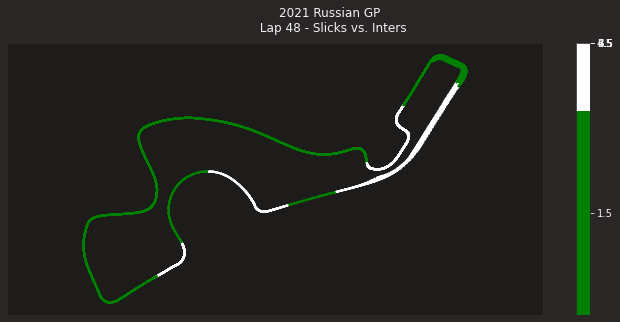

In [25]:
generate_minisector_plot(48, save=True, details=True)